In [1]:
import pandas as pd
bank_data = pd.read_csv('data_test/churn.csv', sep=',')
bank_df = bank_data.copy()
"""Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)"""
bank_df = bank_df.drop (['RowNumber'], axis=1)
print (bank_df.head())
"""Є проблема з віком - що це за категорія? (коли пішов? вік на теперешній час?)
Який час ми розглядаємо в зазначеному зрізі (річний?)"""

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  


'Є проблема з віком - що це за категорія? (коли пішов? вік на теперешній час?)\nЯкий час ми розглядаємо в зазначеному зрізі (річний?)'

([<matplotlib.patches.Wedge at 0x13819065360>,
 [Text(-0.6568642010431011, -0.8823431426537006, '0 - loyal clients'),
  Text(0.6568642010431012, 0.8823431426537006, '1-clients that left')],
 [Text(-0.3582895642053278, -0.4812780778111093, '79.63%'),
  Text(0.35828956420532787, 0.4812780778111093, '20.37%')])

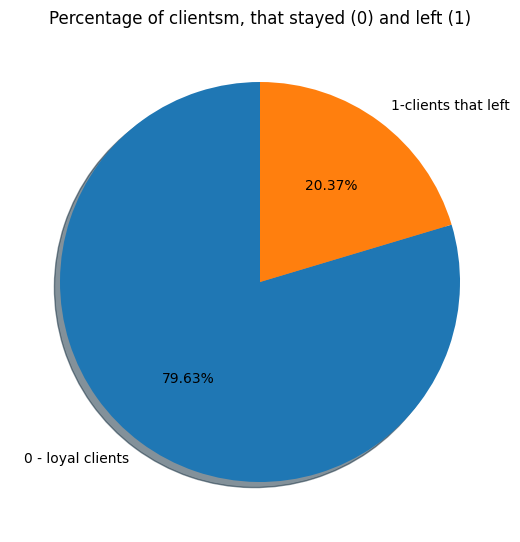

In [14]:
import matplotlib.pyplot as plt
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
exited_ratio = bank_df['Exited'].value_counts()
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title("Percentage of clientsm, that stayed (0) and left (1)")
axes.pie(
    labels=['0 - loyal clients','1-clients that left'],
    autopct='%1.2f%%', #'%.1f%%'
    x=exited_ratio,
    shadow=True,
    startangle=90
)
#Клієнти, які пішли складають 1/5 частину

Age  Geography
18   France       7
     Germany      6
     Spain        1
19   France       5
     Germany      8
                 ..
81   Germany      1
83   Germany      1
84   France       1
     Germany      1
92   France       2
Name: Balance, Length: 189, dtype: int64


'Зробив розподіл по країнам та віку, але з різниці бачу тільки, що цікаво, що медіана дорівнює середньому зн.,\nа сума подібна до кіль-ті. Найбільша кількість та суми вкладників припадають на вік від 20-ти до 50 років\nВ Іспанії суми менші загалом ніж у 2-х інших країнах'

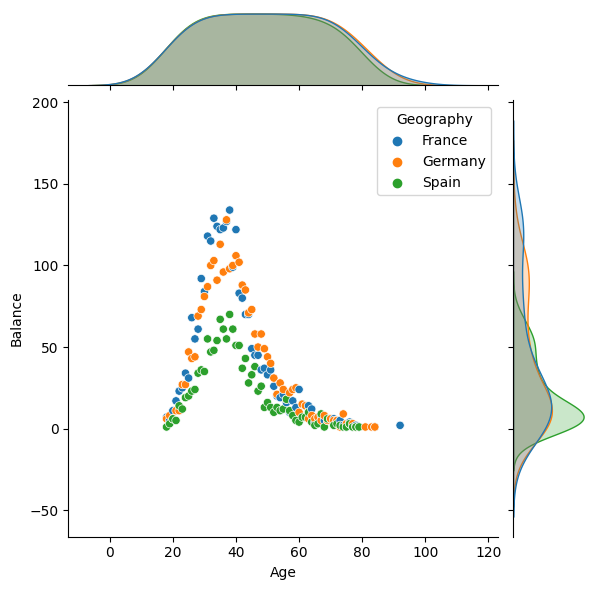

In [2]:
import plotly.express as px
import plotly
import seaborn as sns
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
#Опишите распределение и сделайте выводы.
balance_over_2500 = bank_df[bank_df['Balance'] > 2500]#.sort_values(by=['Geography'])
line_bal = balance_over_2500.groupby(['Age','Geography'])['Balance'].count() 
#не зрозуміло як вкрапляти колонку зі странами? та що за лінії за координатами?
print (line_bal)
"""fig = px.line( #3 separeted lines
    data_frame=line_bal,
    x=line_bal.index[0],
    y=line_bal,
    color ='Geography',
    height=500,
    width=800,
    title='the ratio of the sum and mean balance according to the age in different countries'
)
fig.show()
"""
joinplot = sns.jointplot (
    data=line_bal,
    x='Age',
    y=line_bal,
    hue='Geography',
    height=6,
#    xlim=(0,100), що це за параметри?
#    ylim=(10,100) що за випуклість праворуч від Х
)
"""Зробив розподіл по країнам та віку, але з різниці бачу тільки, що цікаво, що медіана дорівнює середньому зн.,
а сума подібна до кіль-ті. Найбільша кількість та суми вкладників припадають на вік від 20-ти до 50 років
В Іспанії суми менші загалом ніж у 2-х інших країнах"""

Geography  Age
France     18          0.00
           21     210433.08
           22     598525.34
           23          0.00
           24          0.00
                    ...    
Spain      66          0.00
           67     125919.35
           68          0.00
           69     137453.43
           71     206868.92
Name: Balance, Length: 158, dtype: float64


c:\Python\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: setting an array element with a sequence.

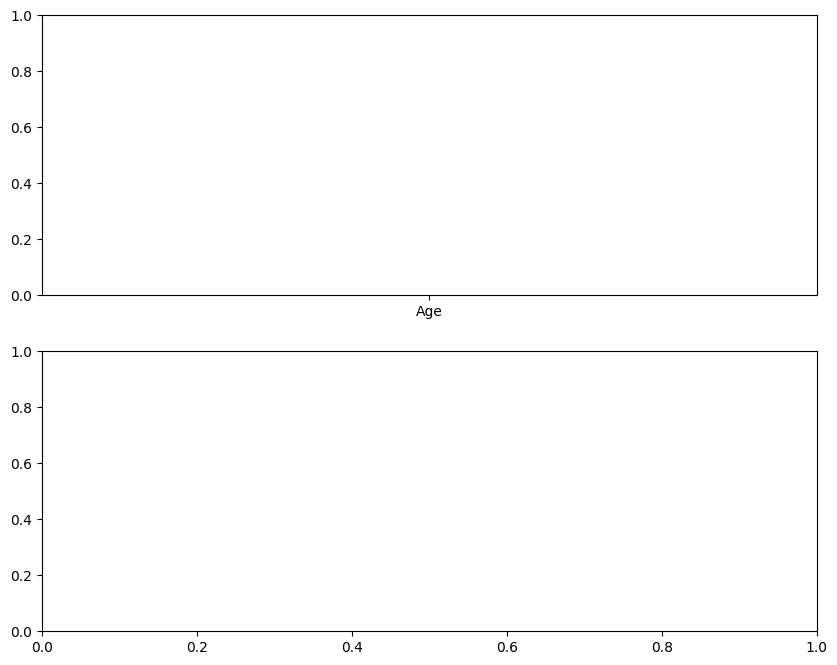

In [6]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на
#накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может
#не устраивать ушедших клиентов в банке.
exited_sum = bank_df[bank_df['Exited'] == 1].groupby(['Geography','Age'])['Balance'].sum()
not_exited_sum = bank_df[bank_df['Exited'] == 0].groupby(['Geography','Age'])['Balance'].sum()
#шкода, що не знаємо, коли клієнт пішов
import matplotlib.pyplot as plt
import seaborn as sns
print (exited_sum)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].bar (
    x='Age',
    y=exited_sum,
    #hue='Geography',
    height=8
);
axes[0].set_title('')
axes[1].plot (
    data=not_exited_sum,
    x='Age',
    y=exited_sum,
    hue='Geography',
    color='tomato',
    lw=2
); #обидва графіки не проходять у Сабплоті

"""import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd
fig,axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].scatter(
    x=exited_sum['']
)

= fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();"""


            CustomerId  Surname  CreditScore  Geography  Gender  Tenure  \
Exited Age                                                                
0      18           20       20           20         20      20      20   
       19           26       26           26         26      26      26   
       20           38       38           38         38      38      38   
       21           50       50           50         50      50      50   
       22           72       72           72         72      72      72   
...                ...      ...          ...        ...     ...     ...   
1      71            7        7            7          7       7       7   
       72            1        1            1          1       1       1   
       73            1        1            1          1       1       1   
       74            1        1            1          1       1       1   
       84            1        1            1          1       1       1   

            Balance  Num

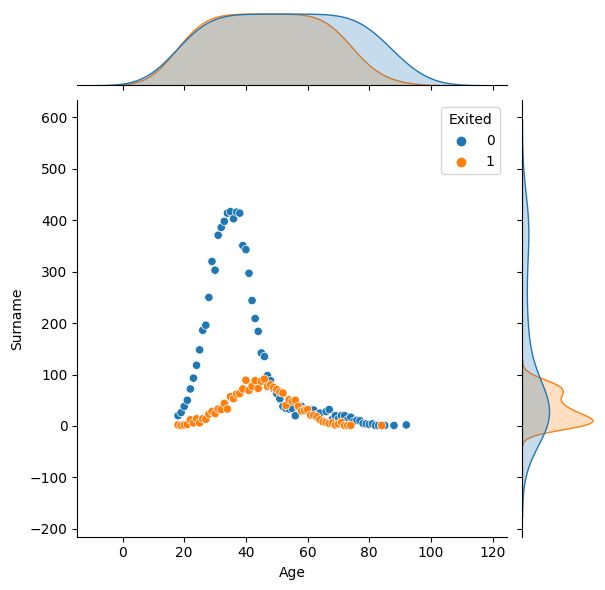

In [12]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?
#На какую возрастную категорию клиентов стоит обратить внимание банку?
data_sep = bank_df.groupby(['Exited','Age']).count()
import plotly.express as px
import plotly
import seaborn as sns
print (data_sep)
joinplot = sns.jointplot (
    data=data_sep,
    x='Age',
    y='Surname',
    hue='Exited',
    height=6,
)
#Варто звернути увагу на клієнтів віком від 30 до 50 років, з піком у 40

In [7]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
#Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной
#взаимосвязи, укажите это.
"""bank_df['Salary_lvl'] = (bank_df['EstimatedSalary'].apply(lambda x:'poor_salary' if x < 10000 else x)
                         .apply(lambda x:'low_salary' if 35000 > x >= 10000 else x)
                         .apply(lambda x:'average_salary' if 60000 > x >= 35000 else x)
                         .apply(lambda x:'good_salary' if x >= 60000 else x))
#bank_df['Salary_lvl'] = bank_df['EstimatedSalary'].apply(lambda x:'low_salary' if 35000 > x >= 10000 else x)
#bank_df['Salary_lvl'] = bank_df['EstimatedSalary'].apply(lambda x:'average_salary' if 60000 > x >= 35000 else x)
#bank_df['Salary_lvl'] = bank_df['EstimatedSalary'].apply(lambda x:'good_salary' if x >= 60000 else x)"""

Credit_score = bank_df.pivot_table(
    values='CreditScore'
    index=
    )['EstimatedSalary']"""
print(bank_df.head(25))

TypeError: '>' not supported between instances of 'int' and 'str'

33.46
19.7


C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_14380\762324983.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exited_female = bank_df[bank_df['Gender'] == 'Female'][bank_df['Exited'] == 1].count()
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_14380\762324983.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  left_female = bank_df[bank_df['Gender'] == 'Female'][bank_df['Exited'] == 0].count()
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_14380\762324983.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exited_male = bank_df[bank_df['Gender'] == 'Male'][bank_df['Exited'] == 1].count()
C:\Users\управ.ПК\AppData\Local\Temp\ipykernel_14380\762324983.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  left_male = bank_df[bank_df['Gender'] == 'Male'][bank_df['Exited'] == 0].count()


Text(0.5, 1.0, 'Left clients according to the gender')

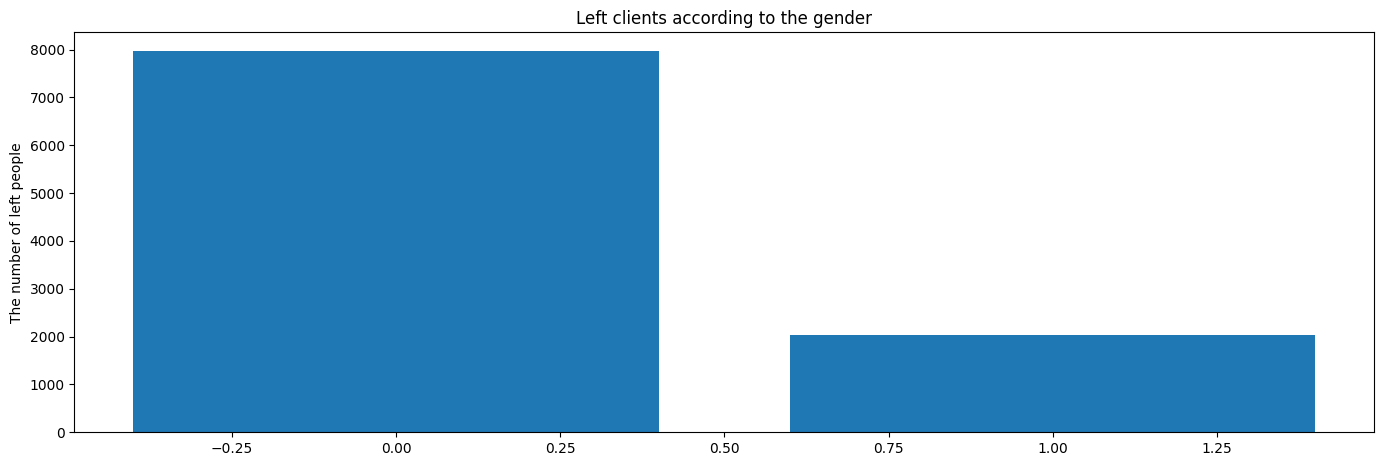

In [37]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
"""Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это
ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов)."""

exited_female = bank_df[bank_df['Gender'] == 'Female'][bank_df['Exited'] == 1].count()
left_female = bank_df[bank_df['Gender'] == 'Female'][bank_df['Exited'] == 0].count()
perc_exit_fem = round (exited_female[0] / left_female[0] * 100,2)
print (perc_exit_fem)
exited_male = bank_df[bank_df['Gender'] == 'Male'][bank_df['Exited'] == 1].count()
left_male = bank_df[bank_df['Gender'] == 'Male'][bank_df['Exited'] == 0].count()
perc_exit_male = round (exited_male[0] / left_male[0] * 100,2)
print(perc_exit_male)
#Частіше йдуть з банку жінки.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
fig = plt.figure(figsize=(13,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(x = exited_gender.index, height = exited_gender) # set_color('r')) #color = exited_gender.index);
axes.set_ylabel('The number of left people')
axes.set_title('Left clients according to the gender')
#Частіше йдуть з банку жінки.//add bar with left-clients

1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64


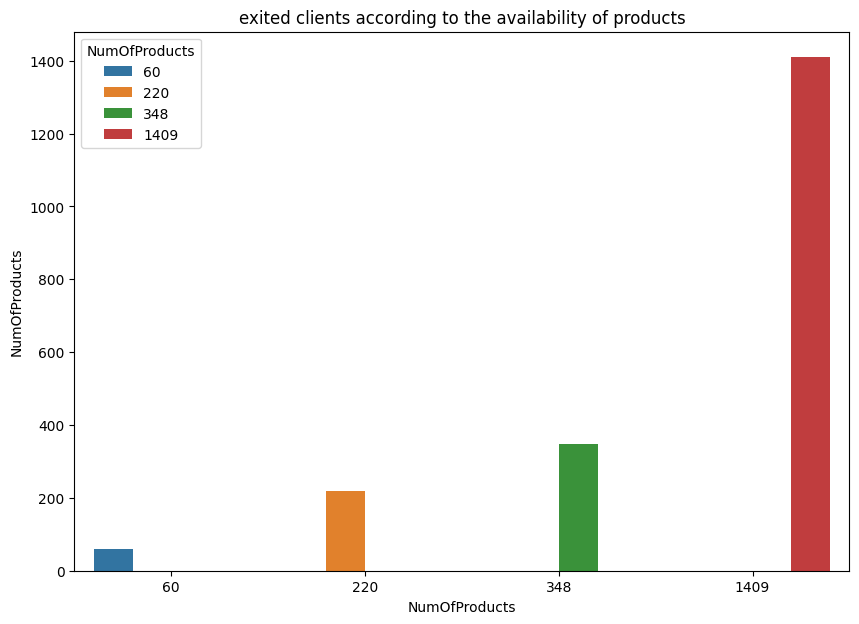

In [12]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте
#многоуровневую столбчатую диаграмму.
exited_products = bank_df[bank_df['Exited'] == 1]['NumOfProducts'].value_counts()
print (exited_products)
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=exited_products,
    x=exited_products,
    y=exited_products,
    hue=exited_products.index,
)
barplot.set_title('exited clients according to the availability of products');


0    1302
1     735
Name: IsActiveMember, dtype: int64


Text(0.5, 1.0, 'How active were clients before leaving')

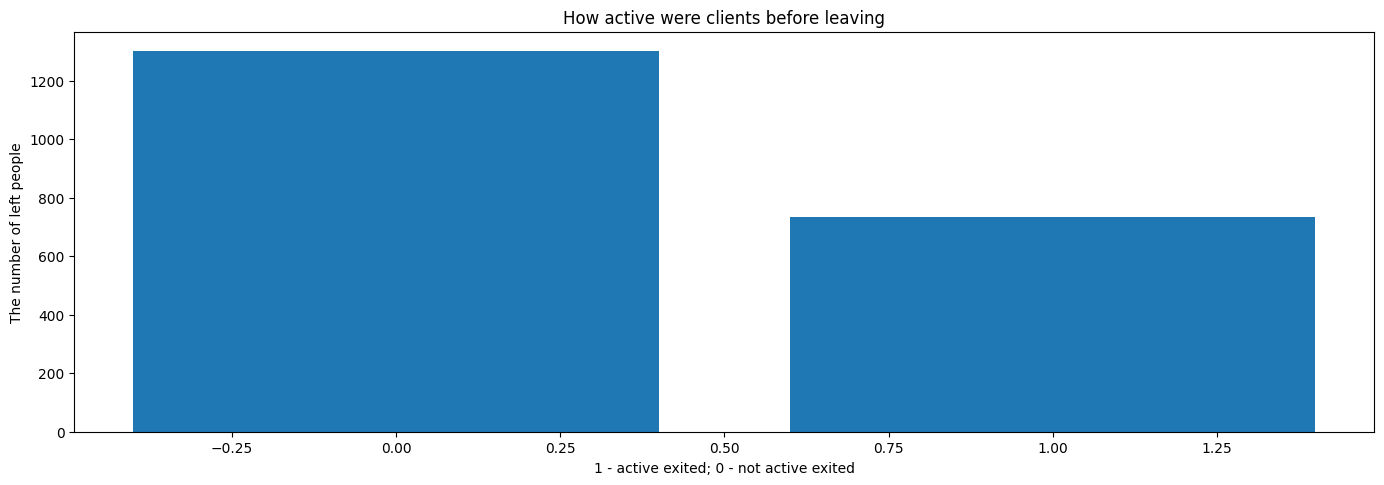

In [15]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это.
#Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных? 1- active
exited_active = bank_df[bank_df['Exited'] == 1]['IsActiveMember'].value_counts()
print (exited_active)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
fig = plt.figure(figsize=(13,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(x = exited_active.index, height = exited_active) # set_color('r')) #color = exited_gender.index);
axes.set_ylabel('The number of left people')
axes.set_xlabel('0 - not active exited;  1 - active exited ')
axes.set_title('How active were clients before leaving')

In [37]:
#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это
#соотношение на карте мира. Предположите, с чем это может быть связано.
exited_country = bank_df[bank_df['Exited'] == 1].groupby('Geography').count()
#exited_country = [x for x in exited_country if x != None]
#exited_country(lambda x: x!=None, exited_country)
#exited_country.dropna()
print(exited_country)

           CustomerId  Surname  CreditScore  Gender  Age  Tenure  Balance  \
Geography                                                                   
France            810      810          810     810  810     810      810   
Germany           814      814          814     814  814     814      814   
Spain             413      413          413     413  413     413      413   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
Geography                                                                     
France               810        810             810              810     810  
Germany              814        814             814              814     814  
Spain                413        413             413              413     413  


In [ ]:
#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией
#get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак
#CreditScoreCat — категории кредитного рейтинга.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
"""Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а
столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной
таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории
клиентов, которые уходят чаще всего."""
